### CONSIDER DATASET WHICH IS LINEARLY SEPERABLE

IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#Training Data
x = np.array([[1,2],[3,2],[3,4],[7,2],[10,1],[7,3],[11,4],[13,3]])
y = np.array([1,1,1,-1,-1,-1,-1,-1])



In [ ]:
#Testing Data
x_test=np.array([[1,2],[3,2],[3,4],[7,2],[10,1],[7,3],[11,4],[13,3]])

#Adding 1st column as bias
x = np.c_[np.ones((x.shape[0])), x]



In [ ]:
#For Testing
x_test = np.c_[np.ones((x.shape[0])), x_test]

#Initialize weights, epochs, learning rate
w = np.random.uniform(size=(x.shape[1],))
epochs=500
learning_rate=0.02



In [ ]:
#Stochastic Gradient Descent with hinge loss
for epoch in range (0,epochs):
    randomize = np.arange(len(x))
    np.random.shuffle(randomize)
    x=x[randomize]
    y=y[randomize]
    loss=0
    for xi,yi in zip(x,y):
        loss+=max(0,1-yi*np.dot(xi,w))
        if(yi*np.dot(xi,w)<1):
            #grad+=-yi*xi
            w=w-learning_rate*(-yi*xi)
        else:
            #grad+=0
            w=w
    #print(w,loss)



In [ ]:
#Predicting with new values
def predict(x,w):
    return(np.sign(np.dot(x,w)))




In [ ]:
#Plotting        
def plot(x,w):
    Y=(-w[0] - (w[1] * x)) / w[2]
    psy=(1-w[0] - (w[1] * x)) / w[2]
    nsy=(-1-w[0] - (w[1] * x)) / w[2]
    plt.figure()
    plt.scatter(x[:,1],x[:,2],c=y,edgecolor='black', cmap=plt.cm.Paired,s=20)
    plt.plot(x,Y,'r-')
    plt.plot(x,psy,'b-')
    plt.plot(x,nsy,'b-')
    margin=2/np.sqrt(w[1]**2+w[2]**2)
    plt.show()



In [ ]:
ans=predict(x_test,w)
#print(ans)

#Finding values for slack variables
for xi,yi in zip(x,y):
    slack=max(0,1-yi*np.dot(xi,w))
    print(xi[1:],' Slack:',slack)



[7. 3.]  Slack: 0
[11.  4.]  Slack: 0
[3. 2.]  Slack: 0
[1. 2.]  Slack: 0
[3. 4.]  Slack: 0
[13.  3.]  Slack: 0
[10.  1.]  Slack: 0
[7. 2.]  Slack: 0


HERE WE CAN OBSERVE THE SLACK VALUE IS ZERO BECAUSE THE DATA IS LINEARLY SEPARABLE

Support Vector: [7. 3.]


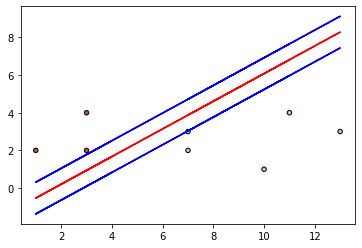

In [ ]:
#Finding Support Vectors
for xi in x:
    if(round(np.linalg.norm((np.dot(xi,w))*(w/np.linalg.norm(w))),1)==1):
        print("Support Vector:",xi[1:])
plot(x,w)

## NOW LET ME ASSUME DATASET WHICH IS NOT LINEARLY SEPARABLE

[ 1.  1. -1. -1. -1. -1. -1. -1.]
[7. 2.]  Slack: 0.695423721804097
[7. 3.]  Slack: 0.31911394318071074
[10.  1.]  Slack: 0.3756010468279585
[3. 2.]  Slack: 0.3763996733965369
[11.  4.]  Slack: 2.985372440242042
[3. 4.]  Slack: 0.8709807693566907
[1. 2.]  Slack: 0
[13.  3.]  Slack: 0


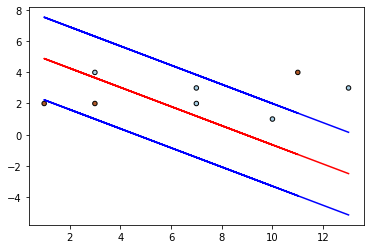

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#Training Data
x = np.array([[1,2],[3,2],[3,4],[7,2],[10,1],[7,3],[11,4],[13,3]])
y = np.array([1,1,-1,-1,-1,-1,1,-1])

#Testing Data
x_test=np.array([[1,2],[3,2],[3,4],[7,2],[10,1],[7,3],[11,4],[13,3]])

#Adding 1st column as bias
x = np.c_[np.ones((x.shape[0])), x]

#For Testing
x_test = np.c_[np.ones((x.shape[0])), x_test]

#Initialize weights, epochs, learning rate
w = np.random.uniform(size=(x.shape[1],))
epochs=1000
learning_rate=0.01

#Stochastic Gradient Descent with hinge loss
for epoch in range (0,epochs):
    randomize = np.arange(len(x))
    np.random.shuffle(randomize)
    x=x[randomize]
    y=y[randomize]
    loss=0
    for xi,yi in zip(x,y):
        loss+=max(0,1-yi*np.dot(xi,w))
        if(yi*np.dot(xi,w)<1):
            #grad+=-yi*xi
            w=w-learning_rate*(-yi*xi)
        else:
            #grad+=0
            w=w
    #print(w,loss)

#Predicting with new values
def predict(x,w):
    return(np.sign(np.dot(x,w)))

#Plotting        
def plot(x,w):
    Y=(-w[0] - (w[1] * x)) / w[2]
    psy=(1-w[0] - (w[1] * x)) / w[2]
    nsy=(-1-w[0] - (w[1] * x)) / w[2]
    plt.figure()
    plt.scatter(x[:,1],x[:,2],c=y,edgecolor='black', cmap=plt.cm.Paired,s=20)
    plt.plot(x,Y,'r-')
    plt.plot(x,psy,'b-')
    plt.plot(x,nsy,'b-')
    margin=2/np.sqrt(w[1]**2+w[2]**2)
    plt.show()

ans=predict(x_test,w)
print(ans)

#Finding values for slack variables
for xi,yi in zip(x,y):
    slack=max(0,1-yi*np.dot(xi,w))
    print(xi[1:],' Slack:',slack)

#Finding Support Vectors
for xi in x:
    if(round(np.linalg.norm((np.dot(xi,w))*(w/np.linalg.norm(w))),1)==1):
        print("Support Vector:",xi[1:])
plot(x,w)

Now we can see the value of slack is non-zero. Also observe that for (11,4) point we got highest value of slack because it is missclasified.

## **LET US IMPLEMENT ON IRIS DATASET**

## HERE WE WILL CONSIDER FEATURES PETAL LENGTH AND PETAL WIDTH .
## DATASET LINEARLY SEPARABLE.

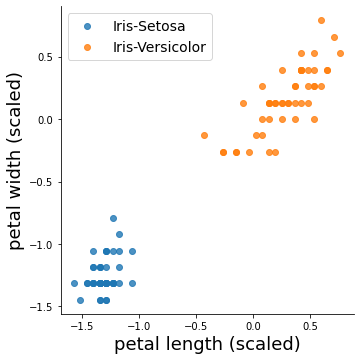

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



from sklearn import datasets
iris = datasets.load_iris()

X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] 
data.head()

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

X=data.loc[:, ["petal length", "petal width"]]

X=X.values

y=data['target']
y=list(y)

#print(y)
z=[]
for i in y:
  if i==0:
    z.append(-1)
  else:
    z.append(1)

y=np.array(z).reshape(-1,1)

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100, 1)

ans [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[0.13754657 0.13250973]  Slack: 0
[-1.05603939 -1.3154443 ]  Slack: 0
[0.42173371 0.3957741 ]  Slack: 0
[0.13754657 0.00087755]  Slack: 0
[-1.34022653 -1.3154443 ]  Slack: 0
[0.36489628 0.26414192]  Slack: 0
[0.08070915 0.26414192]  Slack: 0
[-1.2833891 -1.3154443]  Slack: 0
[0.30805885 0.13250973]  Slack: 0
[-1.39706395 -1.3154443 ]  Slack: 0
[-1.2833891 -1.3154443]  Slack: 0
[-1.2833891 -1.3154443]  Slack: 0
[-1.16971425 -1.3154443 ]  Slack: 0
[-1.34022653 -1.44707648]  Slack: 0
[-1.34022653 -1.3154443 ]  Slack: 0
[-1.2833891  -1.44707648]  Slack: 0
[-1.16971425 -0.92054774]  Slac

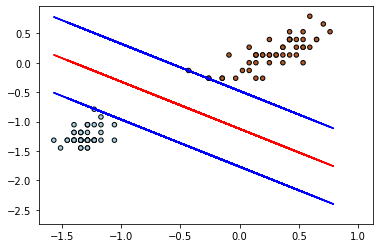

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


x=x_test=np.array(X)
y=np.array(y)



x = np.c_[np.ones((x.shape[0])), x]

#For Testing
x_test = np.c_[np.ones((x.shape[0])), x_test]

#Initialize weights, epochs, learning rate
w = np.random.uniform(size=(x.shape[1],))
epochs=1000
learning_rate=0.01

#Stochastic Gradient Descent with hinge loss
for epoch in range (0,epochs):
    randomize = np.arange(len(x))
    np.random.shuffle(randomize)
    x=x[randomize]
    y=y[randomize]
    loss=0
    for xi,yi in zip(x,y):
        loss+=max(0,1-yi*np.dot(xi,w))
        if(yi*np.dot(xi,w)<1):
            #grad+=-yi*xi
            w=w-learning_rate*(-yi*xi)
        else:
            #grad+=0
            w=w
    #print(w,loss)

#Predicting with new values
def predict(x,w):
    return(np.sign(np.dot(x,w)))

#Plotting        
def plot(x,w):
    Y=(-w[0] - (w[1] * x)) / w[2]
    psy=(1-w[0] - (w[1] * x)) / w[2]
    nsy=(-1-w[0] - (w[1] * x)) / w[2]
    plt.figure()
    plt.scatter(x[:,1],x[:,2],c=y,edgecolor='black', cmap=plt.cm.Paired,s=20)
    plt.plot(x,Y,'r-')
    plt.plot(x,psy,'b-')
    plt.plot(x,nsy,'b-')
    margin=2/np.sqrt(w[1]**2+w[2]**2)
    plt.show()

ans=predict(x_test,w)
print('ans',ans)

#Finding values for slack variables
for xi,yi in zip(x,y):
    slack=max(0,1-yi*np.dot(xi,w))
    print(xi[1:],' Slack:',slack)

#Finding Support Vectors
for xi in x:
    if(round(np.linalg.norm((np.dot(xi,w))*(w/np.linalg.norm(w))),1)==1):
        print("Support Vector:",xi[1:])
plot(x,w)

The value of slack is zero because dataset is linearly separable

## HERE WE WILL CONSIDER FEATURES SEPAL LENGTH AND SEPAL WIDTH 
## DATASET NOT-LINEARLY SEPARABLE.

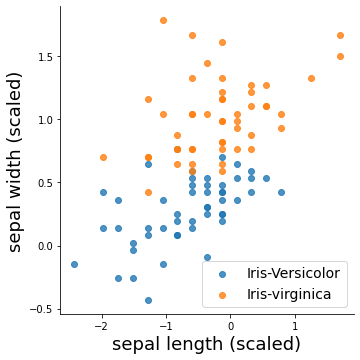

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,1:3]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)





data = pd.DataFrame(data=Xstan, columns=['sepal length','sepal width'])
data['target'] = iris['target']
data = data[data['target']!=0] 
data.head()

sns.lmplot(x='sepal length',y='sepal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Versicolor','Iris-virginica'], fontsize = 14)
plt.xlabel('sepal length (scaled)', fontsize = 18)
plt.ylabel('sepal width (scaled)', fontsize = 18)
plt.show()


X=data.loc[:, ["sepal length", "sepal width"]]

X=X.values

y=data['target']

y=list(y)

z=[]
for i in y:
  if i==1:
    z.append(-1)
  else:
    z.append(1)



    y=np.array(z).reshape(-1,1)



In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100, 1)

In [ ]:
w.shape

(3,)

ans [-1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[-0.36217625  0.47857113]  Slack: 0
[-0.59237301  1.33113254]  Slack: 0
[0.32841405 1.10378283]  Slack: 0
[-0.13197948  0.76275827]  Slack: 0
[-0.59237301  0.194384  ]  Slack: 0
[-0.36217625  1.44480739]  Slack: 0
[-1.97355361  0.70592084]  Slack: 0
[0.55861082 0.53540856]  Slack: 0
[-0.82256978  0.08070915]  Slack: 0
[0.78880759 0.42173371]  Slack: 0
[-0.13197948  0.99010798]  Slack: 0
[-1.28296331  0.13754657]  Slack: 0
[-0.13197948  0.194384  ]  Slack: 0
[-0.13197948  0.42173371]  Slack: 0
[1.70959465 1.6721571 ]  Slack: 0
[-0.13197948  0.8195957 ]  Slack: 0
[-0.13197948  0.36489

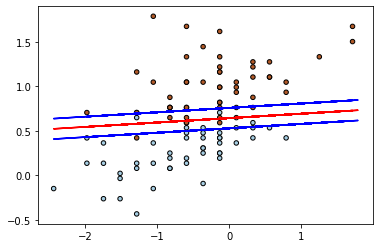

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


x=x_test=np.array(X)
y=np.array(y)



x = np.c_[np.ones((x.shape[0])), x]

#For Testing
x_test = np.c_[np.ones((x.shape[0])), x_test]

#Initialize weights, epochs, learning rate
w = np.random.uniform(size=(x.shape[1],))
epochs=1000
learning_rate=0.01

#Stochastic Gradient Descent with hinge loss
for epoch in range (0,epochs):
    randomize = np.arange(len(x))
    np.random.shuffle(randomize)
    x=x[randomize]
    y=y[randomize]
    loss=0
    for xi,yi in zip(x,y):
        loss+=max(0,1-yi*np.dot(xi,w))
        if(yi*np.dot(xi,w)<1):
            #grad+=-yi*xi
            w=w-learning_rate*(-yi*xi)
        else:
            #grad+=0
            w=w
    #print(w,loss)

#Predicting with new values
def predict(x,w):
    return(np.sign(np.dot(x,w)))

#Plotting        
def plot(x,w):
    Y=(-w[0] - (w[1] * x)) / w[2]
    psy=(1-w[0] - (w[1] * x)) / w[2]
    nsy=(-1-w[0] - (w[1] * x)) / w[2]
    plt.figure()
    plt.scatter(x[:,1],x[:,2],c=y,edgecolor='black', cmap=plt.cm.Paired,s=20)
    plt.plot(x,Y,'r-')
    plt.plot(x,psy,'b-')
    plt.plot(x,nsy,'b-')
    margin=2/np.sqrt(w[1]**2+w[2]**2)
    plt.show()

ans=predict(x_test,w)
print('ans',ans)

#Finding values for slack variables
for xi,yi in zip(x,y):
    slack=max(0,1-yi*np.dot(xi,w))
    print(xi[1:],' Slack:',slack)

#Finding Support Vectors
for xi in x:
    if(round(np.linalg.norm((np.dot(xi,w))*(w/np.linalg.norm(w))),1)==1):
        print("Support Vector:",xi[1:])
plot(x,w)

WE CAN OBSERVE NON-ZERO SLACK VALUES.